In [2]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
sns.set_style('darkgrid')
plt.rcParams['figure.dpi'] = 80

In [4]:
df = pd.read_csv('../data/PS_20174392719_1491204439457_log.csv')
df = df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [5]:
df['IsPayment'] = df['type'].apply(lambda x: 1 if x == 'PAYMENT' or x == 'DEBIT' else 0)
df['IsMovement'] = df['type'].apply(lambda x: 1 if x == 'TRANSFER' or x == 'CASH_OUT' else 0)
df['accountDiff'] = abs(df['oldbalanceDest'] - df['oldbalanceOrg'])

df.accountDiff.describe()

count    6.362620e+06
mean     1.563497e+06
std      4.027698e+06
min      0.000000e+00
25%      2.016600e+04
50%      2.145337e+05
75%      1.311500e+06
max      3.560159e+08
Name: accountDiff, dtype: float64

In [6]:
df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
feautures = df[['amount', 'IsPayment', 'IsMovement', 'accountDiff']]
target = df['isFraud']

## Oversampling

In [7]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

In [9]:
X, y = smote.fit_resample(feautures, target)

y.value_counts()

isFraud
0    6354407
1    6354407
Name: count, dtype: int64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train.shape, x_test.shape

((10167051, 4), (2541763, 4))

In [12]:
p = Perceptron(max_iter=100, eta0=0.1, random_state=42)
p.fit(x_train, y_train)

Perceptron(eta0=0.1, max_iter=100, random_state=42)

In [14]:
p.score(x_train, y_train)

0.6434804939996859

In [13]:
p.score(x_test, y_test)

0.6436914063191572

In [15]:
print(classification_report(y_test, p.predict(x_test)))

              precision    recall  f1-score   support

           0       0.60      0.87      0.71   1270837
           1       0.77      0.41      0.54   1270926

    accuracy                           0.64   2541763
   macro avg       0.68      0.64      0.62   2541763
weighted avg       0.68      0.64      0.62   2541763



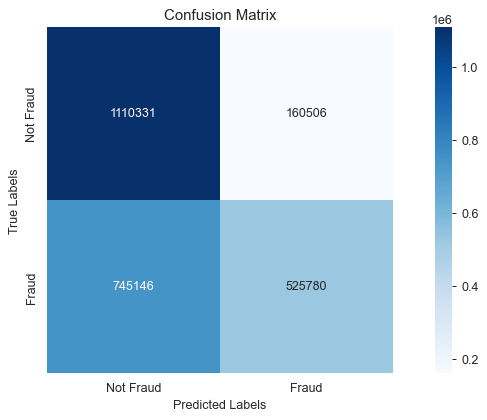

In [18]:
plt.figure(figsize=(12, 5), dpi=90)

sns.heatmap(
    confusion_matrix(y_test, p.predict(x_test)),
    annot=True,
    cmap='Blues',
    fmt='d',
    xticklabels=['Not Fraud', 'Fraud'],
    yticklabels=['Not Fraud', 'Fraud'],
    square=True
)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()